In [8]:
import numpy as np
import pandas as pd

# Step 1: Define the data for the models and criteria
data = {
    'Model': ['GPT-3', 'BERT', 'T5'],
    'Accuracy': [0.95, 0.90, 0.88],
    'Speed': [0.80, 0.85, 0.90],
    'Resource Usage': [0.90, 0.80, 0.75]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 2: Normalize the decision matrix
# Normalize each column (excluding the model name column)
criteria = ['Accuracy', 'Speed', 'Resource Usage']
normalized_matrix = df[criteria].apply(lambda x: x / np.linalg.norm(x))

# Step 3: Construct the weighted decision matrix
# Weights for each criterion (can be adjusted)
weights = {'Accuracy': 0.4, 'Speed': 0.2, 'Resource Usage': 0.4}

# Apply weights to the normalized matrix
weighted_matrix = normalized_matrix * np.array([weights[criterion] for criterion in criteria])

# Step 4: Calculate the ideal and negative-ideal solutions
ideal_solution = weighted_matrix.max()
negative_ideal_solution = weighted_matrix.min()

# Step 5: Calculate the separation measures
# Euclidean distance to ideal and negative-ideal solutions
S_plus = np.sqrt(((weighted_matrix - ideal_solution) ** 2).sum(axis=1))
S_minus = np.sqrt(((weighted_matrix - negative_ideal_solution) ** 2).sum(axis=1))

# Step 6: Calculate the relative closeness to the ideal solution
C_star = S_minus / (S_plus + S_minus)

# Step 7: Rank the models
df['Closeness to Ideal'] = C_star
df['Rank'] = df['Closeness to Ideal'].rank(ascending=False)

# Display the results
print(df[['Model', 'Closeness to Ideal', 'Rank']])


   Model  Closeness to Ideal  Rank
0  GPT-3            0.771715   1.0
1   BERT            0.341942   2.0
2     T5            0.228285   3.0


In [9]:
df.to_csv('model_ranking_results.csv', index=False)

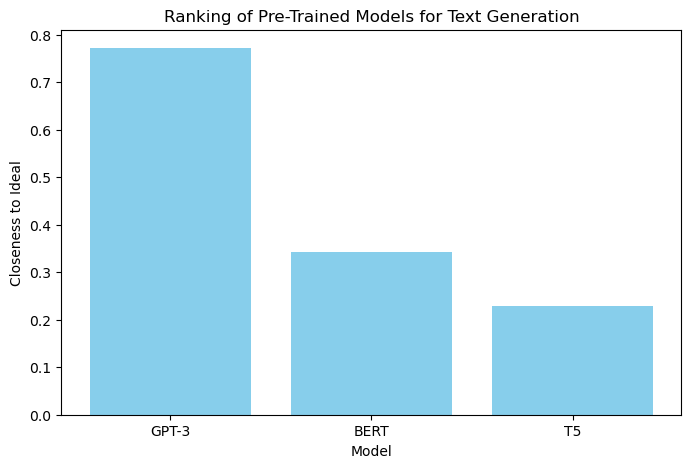

In [11]:
# Plot the results (Bar chart of rankings)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df['Model'], df['Closeness to Ideal'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Closeness to Ideal')
plt.title('Ranking of Pre-Trained Models for Text Generation')
plt.savefig('ranking_plot.png')
plt.show()